In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Librería para ejecutar comandos para diagramar polos y ceros
!pip install control
import control

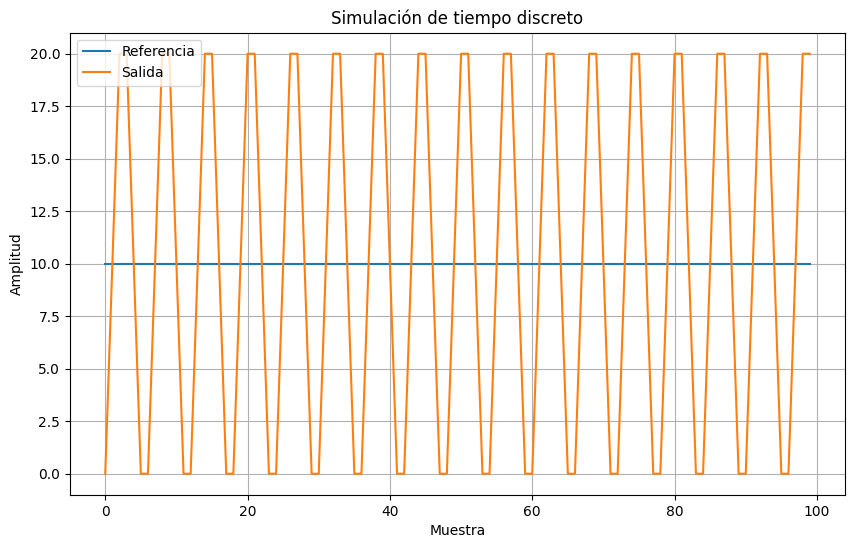

In [ ]:
#Sistema de tiempo discreto representado con una ecuación de diferencias


def discrete_time_system(entrada, initial_output, Kp, num_samples):
  """
  Simulates a discrete-time system with proportional feedback.

  Args:
    reference: The reference signal (a list or numpy array).
    initial_output: The initial output of the system.
    Kp: The proportional gain.
    num_samples: The number of samples to simulate.

  Returns:
    A tuple containing:
      - output: A numpy array of the system's output.
      - error: A numpy array of the error signal.
  """
  output = np.zeros(num_samples)
  error = np.zeros(num_samples)
  output[0] = initial_output  # Initialize the output

  for i in range(1, num_samples):

    output[i] = entrada[i] -entrada/2[i-1] # Next output value

  return output, error


# Example usage:
num_samples = 100
entrada = np.ones(num_samples) * 10 # Step Reference at value 10
initial_output = 0
Kp = 1  # Proportional gain

output, error = discrete_time_system(entrada, initial_output, Kp, num_samples)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(reference, label='Referencia')
plt.plot(output, label='Salida')
# plt.plot(error, label='Error') #optional error plot
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.title('Simulación de tiempo discreto')
plt.legend()
plt.grid(True)
plt.show()

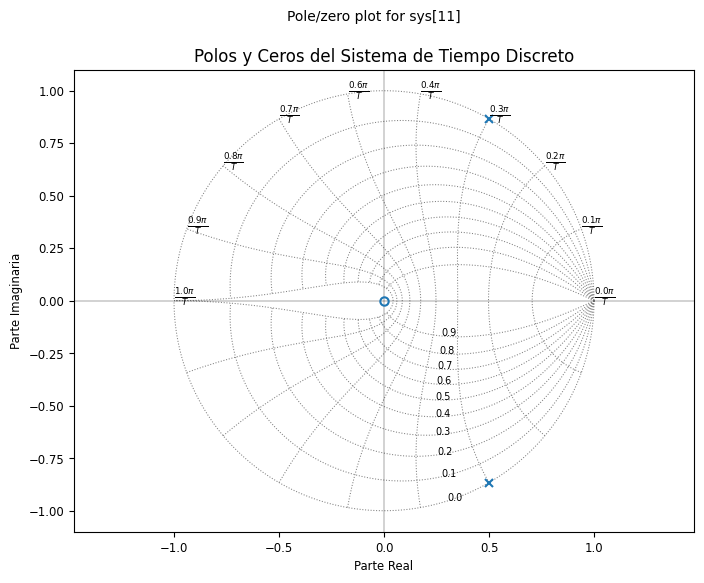

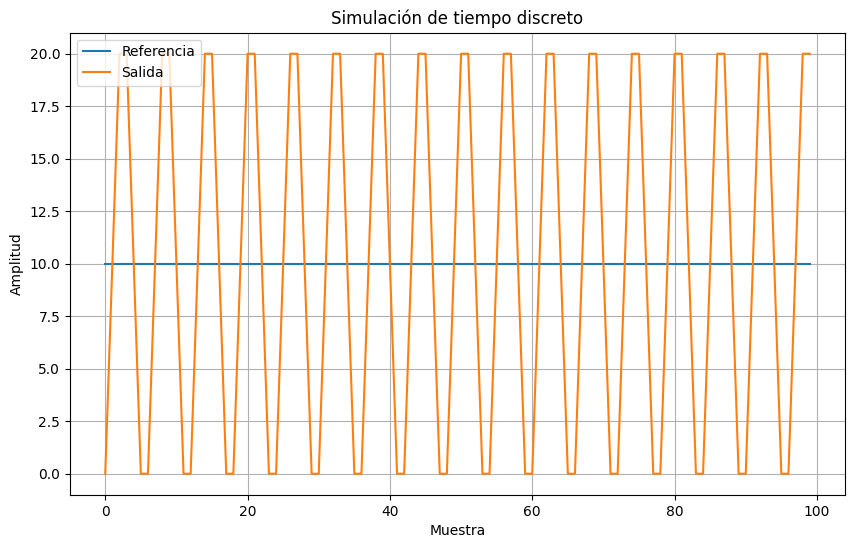

In [ ]:
# Diagramar polos y ceros del sistema de tiempo discreto


#Función de transferencia de tiempo discreto
#Ecuación de diferencias: y[n] = y[n-1] - Kp*(r[n] - y[n-2])
#Transformada Z:
#Y(z) = z^-1 * Y(z) + Kp*(R(z) - z^-2 * Y(z))
#Función de transferencia H(z) = Y(z)/R(z):
#H(z) = (Kp) / (1 - z^-1 + Kp*z^-2)
#H(z) = (Kp * z^2) / (z^2 - z + Kp)


num = [Kp, 0] #Numerator coefficients
den = [1, -1, Kp] #Denominator coefficients


sys_z = control.TransferFunction(num, den, dt=1) #Discrete transfer function


#Plot poles and zeros
plt.figure(figsize=(8, 6))
control.pzmap(sys_z, grid=True)
plt.title('Polos y Ceros del Sistema de Tiempo Discreto')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(reference, label='Referencia')
plt.plot(output, label='Salida')
# plt.plot(error, label='Error') #optional error plot
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.title('Simulación de tiempo discreto')
plt.legend()
plt.grid(True)
plt.show()

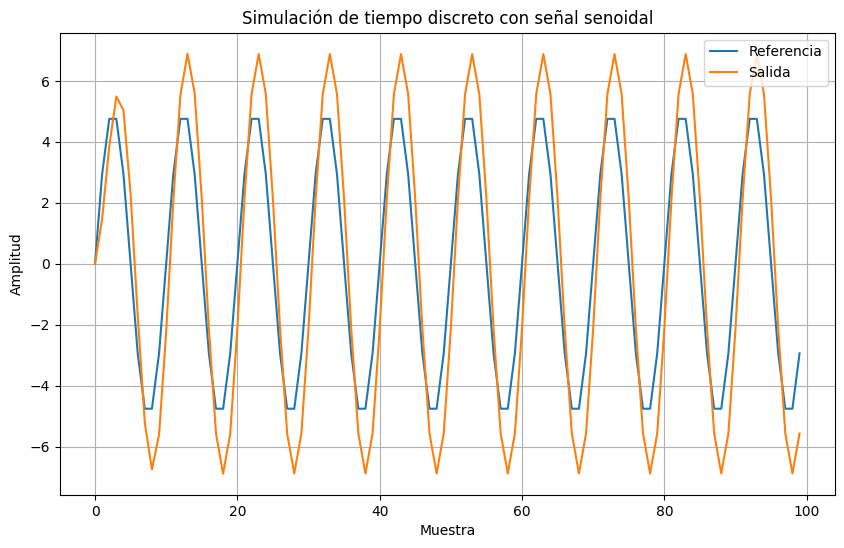

In [ ]:
#Referencia de tiempo discreto senoidal

import numpy as np
import matplotlib.pyplot as plt

#Sistema de tiempo discreto representado con una ecuación de diferencias

def discrete_time_system(reference, initial_output, Kp, num_samples):
  """
  Simulación de un sistema discreto con realimentación proporcional.

  Args:
    reference: es la señal de referencia (una lista o arreglo numpy).
    initial_output: Salida inicial del sistema.
    Kp: Ganancia proporcional.
    num_samples:Número de muestras en la simulación

  Devuelve:
    Una tupla que contiene:
      - output: Un arreglo numpy con valores de salida.
      - error: Un arreglo numpy con señal de error.
  """
  output = np.zeros(num_samples)
  error = np.zeros(num_samples)
  output[0] = initial_output  # Se inicializa la salida

  for i in range(1, num_samples):
    if i >= 2 :
        error[i] = reference[i] - output[i-2] # Error con base en la salida correspondiente a dos muestras retrasadas
    else:
        error[i] = reference[i] #error es sólo referencia en las primeras muestras
    output[i] = output[i - 1] + Kp * error[i] # Siguiente valor de salida

  return output, error


# Ejemplo con referencia senoidal
num_samples = 100
# Señal de referencia senoidal
time = np.arange(num_samples)
frequency = 0.1
amplitude = 5
reference = amplitude * np.sin(2 * np.pi * frequency * time)

initial_output = 0
Kp = 0.5  # Ganancia proporcional

output, error = discrete_time_system(reference, initial_output, Kp, num_samples)


# Se grafican los resultados
plt.figure(figsize=(10, 6))
plt.plot(reference, label='Referencia')
plt.plot(output, label='Salida')

plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.title('Simulación de tiempo discreto con señal senoidal')
plt.legend()
plt.grid(True)
plt.show()